<a href="https://colab.research.google.com/github/MrVeGGi3/AI-for-Games/blob/main/PacManFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PAC MAN EM FUZZY**


**Comportamentos de Fantasmas:**

***Pinky:*** Antecipa o movimento do Pac-Man

***Inky:*** Usa a Posição do Pac-Man e a do Blinky para chegar no outro lado do Pac-Man

***Blinky:*** Sempre Persegue o Pac-Man

***Clyde:*** Persegue o Pac-Man quando estiver perto, porém com uma distância média, ele fica movimentando aleatoriamente.


# **Antecendentes:**



*   **Tipos de Fantasmas:** Inky, Pinky, Blinky, Clyde

*  **Distância:** Igual, Perto, Médio, Longe

*   **Power-Up do Pac-Man:** Tem, Não tem.

# **Consequentes:**

**Ações:** Voltar á Base, Fugir,
 Movimentar, Perseguir, Capturar



In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=fe05292f9c62207b1881318e86c221a60c979a3e24bcdc808906c1cf73a8430c
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# **ANTECENDENTES**

In [75]:
phantom_type = ctrl.Antecedent(np.arange(0,4,1), 'phantom')

In [74]:
phantom_type.universe

array([0, 1, 2])

In [16]:
distance = ctrl.Antecedent(np.arange(0,31,1), 'distance')
#Para deixar mais preciso, poderia ser utilizado (0, 30, número flutuante menor que 1)

In [17]:
distance.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [10]:
power_up = ctrl.Antecedent(np.arange(0,2,1), 'powerup')
#0 = Não Tem, #1 = Tem

In [11]:
power_up.universe

array([0, 1])

In [14]:
action = ctrl.Consequent(np.arange(-2, 3 , 1), "state")
#-2 = Base, -1 = Recuar,0 = Movimentar, 1 = Avançar, 2 = Capturar

In [13]:
action.universe

array([-2, -1,  0,  1,  2])

In [24]:
distance['on'] = fuzz.trimf(distance.universe, [0,0,1])
distance['near'] = fuzz.trimf(distance.universe, [0,5,10])
distance['medium'] = fuzz.trimf(distance.universe, [5,13,20])
distance['far'] = fuzz.trimf(distance.universe, [15,23,30])

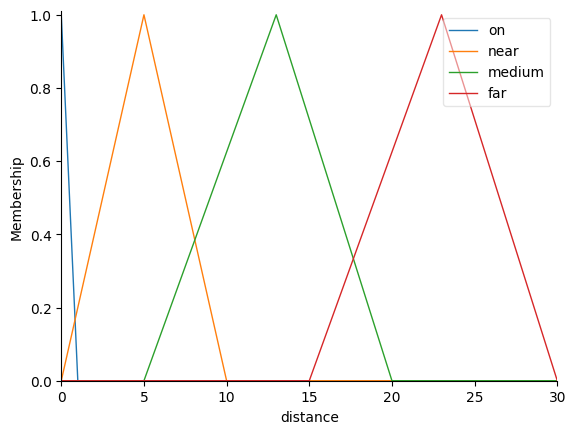

In [25]:
distance.view()

In [33]:
power_up['have'] = fuzz.trimf(power_up.universe, [0,1,1])
power_up['not have'] = fuzz.trimf(power_up.universe,[0,0,1])

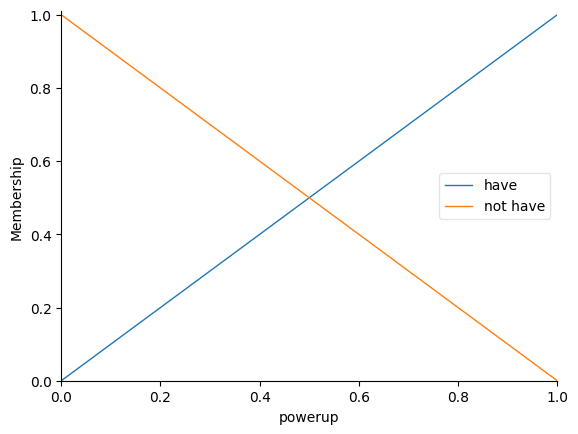

In [34]:
power_up.view()

In [97]:
phantom_names = ['pinky', 'inky', 'blinky', 'clyde']
phantom_type['pinky'] = fuzz.trimf(phantom_type.universe, [0, 0, 1])
phantom_type['inky'] = fuzz.trimf(phantom_type.universe, [1, 1, 2])
phantom_type['blinky'] = fuzz.trimf(phantom_type.universe, [2, 2, 3])
phantom_type['clyde'] = fuzz.trimf(phantom_type.universe, [3, 3, 4])

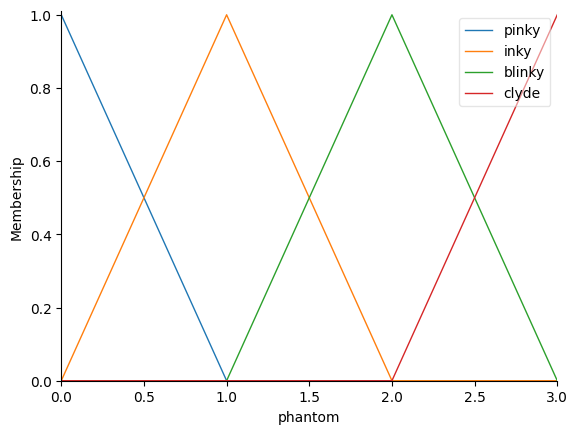

In [78]:
phantom_type.view()

# **Consequente**

In [40]:
action['base'] = fuzz.trimf(action.universe, [-2,-2,-1])
action['run'] = fuzz.trimf(action.universe, [-2,-1, 0])
action['move'] = fuzz.trimf(action.universe, [-1,0,1])
action['follow'] = fuzz.trimf(action.universe, [0,1,2])
action['capture'] = fuzz.trimf(action.universe, [1,2,2])

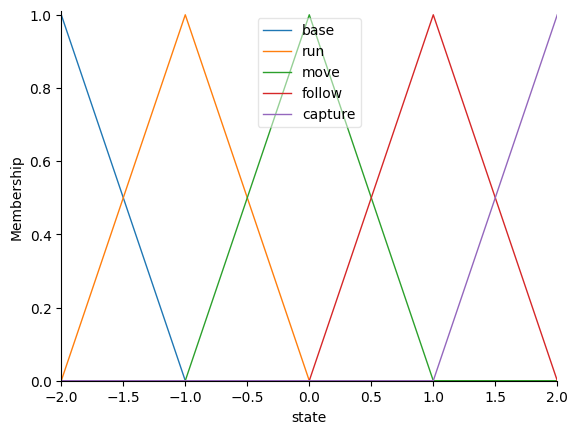

In [41]:
action.view()

# **Regras**


In [109]:
#Regras comuns á todos os fantasmas:
r1 = ctrl.Rule(distance['near'] | distance['far'] | distance['medium'] & power_up['have'], action['run'])
r2 = ctrl.Rule(distance['on'] & power_up['have'], action['base'])
r3 = ctrl.Rule(distance['on'] & power_up['not have'], action['capture'])
#Comportamento do Blinky
r4 = ctrl.Rule(phantom_type['blinky'] & distance['near'] | distance ['medium'] | distance ['far'] & power_up['not have'], action['follow'])
#Comportamento do Clyde
r5 = ctrl.Rule(phantom_type['clyde'] & distance['near'] & power_up['not have'], action['follow'])
r6 = ctrl.Rule(phantom_type['clyde'] & distance['medium'] | distance['far'] & power_up['not have'], action['move'])
#comportamento do Inky
r7 = ctrl.Rule(phantom_type['inky'] & distance['far'] & power_up['not have'], action['follow'])
r8 = ctrl.Rule(phantom_type['inky'] & distance['near'] & power_up['not have'], action['follow'])
r9 = ctrl.Rule(phantom_type['inky'] & distance['medium'] & power_up['not have'], action['move'])
#Comportamento do Pinky
r10 = ctrl.Rule(phantom_type['pinky'] & distance['far'] | distance['medium'] & power_up['not have'], action['move'])
r11 = ctrl.Rule(phantom_type['pinky'] & distance['near'] & power_up['not have'], action['follow'])

In [ ]:
ghost_ctrl = ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10, r11])
ghost_action = ctrl.ControlSystemSimulation(ghost_ctrl)

In [114]:
def simulate_ghost_action(ghost, dist, power):
    ghost_index = phantom_names.index(ghost)
    ghost_action.input['phantom'] = ghost_index
    ghost_action.input['distance'] = dist
    ghost_action.input['powerup'] = power

    ghost_action.compute()

    action_result = ghost_action.output['state']
    action.view(sim = ghost_action)
    return action_result

# **Teste de Inputs**

Teste 1

Ação do Fantasma: -0.00


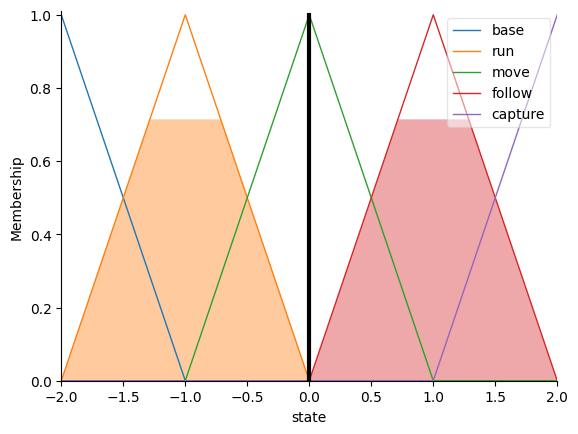

In [116]:
ghost = 'pinky'
dist = 15
power = 1
result = simulate_ghost_action(ghost, dist, power)
print(f"Ação do Fantasma: {result:.2f}")

Teste 2

Ação do Fantasma: -0.00


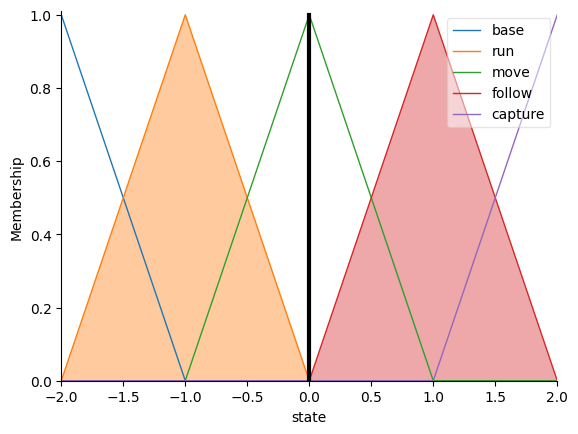

In [117]:
ghost = 'blinky'
dist = 5
power = 0
result = simulate_ghost_action(ghost, dist, power)
print(f"Ação do Fantasma: {result:.2f}")

Ação do Fantasma: 1.67


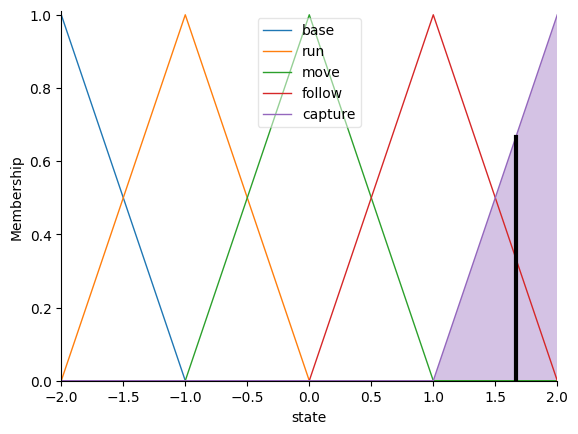

In [118]:
ghost = 'clyde'
dist = 0
power = 0
result = simulate_ghost_action(ghost, dist, power)
print(f"Ação do Fantasma: {result:.2f}")

Ação do Fantasma: -1.67


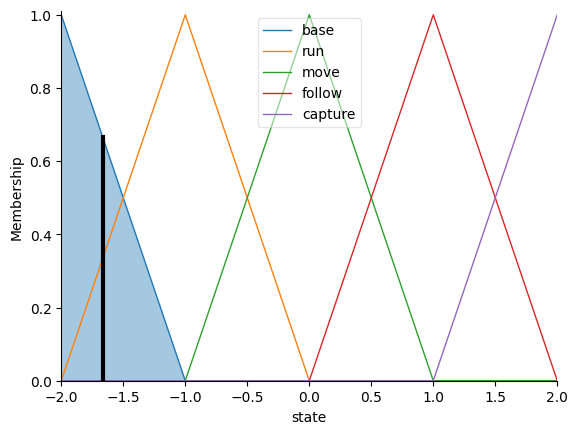

In [119]:
ghost = 'inky'
dist = 0
power = 1
result = simulate_ghost_action(ghost, dist, power)
print(f"Ação do Fantasma: {result:.2f}")